In [1]:
import syft as sy
sy.requires(">=0.8-beta")
import jax
import jax.numpy as jnp

/home/teo/anaconda3/envs/PySyft/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /home/teo


✅ The installed version of syft==0.8.0b6 matches the requirement >=0.8b0


In [2]:
node = sy.orchestra.launch(name="test-domain-1", reset=True)

SQLite Store Path:
!open file:///tmp/7bca415d13ed1ec841f0d0aede098dbb.sqlite

> Starting Worker: test-domain-1 - 7bca415d13ed1ec841f0d0aede098dbb - NodeType.DOMAIN - [<class 'syft.core.node.new.user_service.UserService'>, <class 'syft.core.node.new.metadata_service.MetadataService'>, <class 'syft.core.node.new.action_service.ActionService'>, <class 'syft.core.node.new.test_service.TestService'>, <class 'syft.core.node.new.dataset_service.DatasetService'>, <class 'syft.core.node.new.user_code_service.UserCodeService'>, <class 'syft.core.node.new.request_service.RequestService'>, <class 'syft.core.node.new.data_subject_service.DataSubjectService'>, <class 'syft.core.node.new.network_service.NetworkService'>, <class 'syft.core.node.new.policy_service.PolicyService'>, <class 'syft.core.node.new.message_service.MessageService'>, <class 'syft.core.node.new.project_service.ProjectService'>, <class 'syft.core.node.new.data_subject_member_service.DataSubjectMemberService'>]


In [3]:
guest_domain_client = node.client

In [4]:
guest_domain_client.register(name="Jane Doe", email="jane@caltech.edu", password="abc123", institution="Caltech", website="https://www.caltech.edu/")

<class 'syft.core.node.new.response.SyftSuccess'>: jane@caltech.edu User successfully registered !!!

In [5]:
guest_domain_client.login(email="jane@caltech.edu", password="abc123")

<SyftClient - test-domain-1 <7bca415d13ed1ec841f0d0aede098dbb>: PythonConnection>

In [6]:
from syft.core.node.new.policy import OutputPolicy

@sy.syft_function(input_policy=sy.ExactMatch(),
                  output_policy=sy.SingleExecutionExactOutput())
def func():
    import jax
    import jax.numpy as jnp
    long_vector = jnp.arange(int(1e7))
    %timeit jnp.dot(long_vector, long_vector).block_until_ready()
    # import numpy as np
    # import matplotlib.pyplot as plt
    # import io

    # xs = np.random.normal(size=(100,))
    # noise = np.random.normal(scale=0.1, size=(100,))
    # ys = xs * 3 - 1 + noise

    # plt.scatter(xs, ys)
    # plot = plt.gcf()
    # buf = io.BytesIO()
    # plt.savefig(buf, format='png')
    # buf.seek(0)
    # return buf

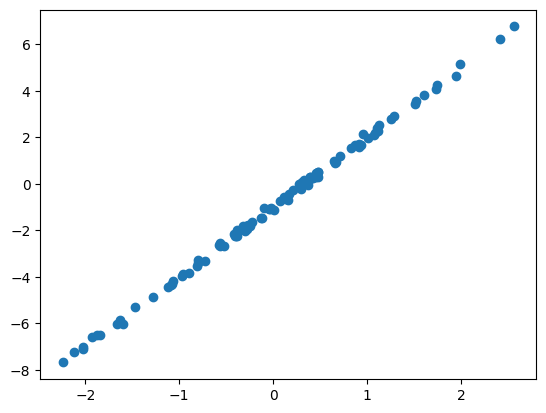

In [7]:
result = func()

In [8]:
import matplotlib as plt
from PIL import Image

im = Image.open(result)

In [12]:
type(im)

PIL.PngImagePlugin.PngImageFile

In [10]:
guest_domain_client.api.services.code.request_code_execution(func)

syft.core.node.new.user_code.SubmitUserCode
syft.core.node.new.user_code.UserCode
Ok(syft.core.node.new.user_code.UserCode)


```python
class Request:
  id: str = 98344dfeb31241f8826d45d53bde36e2
  requesting_user_verify_key: str = 0a02212d0d20cd6a46707f7af169308c8925a05180aa42588aa6fe39dfd92c66
  approving_user_verify_key: str = None
  request_time: str = 2023-04-13 07:21:42
  approval_time: str = None
  status: str = RequestStatus.PENDING
  node_uid: str = 7bca415d13ed1ec841f0d0aede098dbb
  request_hash: str = "5632b324753c1a03b8d12edc77daf2007130d935a76bf8716d093a89e8e79ded"
  changes: str = [syft.core.node.new.request.UserCodeStatusChange]

```

In [11]:
# guest_domain_client.api.services.code.func()